a aula 6 não teve codigo

In [1]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.visualization import plot_bloch_multivector
import qiskit.quantum_info as qi

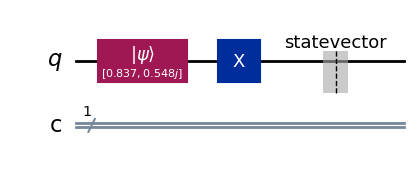

In [2]:
circuit = QuantumCircuit(1,1)

circuit.initialize([np.sqrt(0.7), +1j*np.sqrt(0.3)],0)
circuit.x(0)

circuit.save_statevector()


circuit.draw("mpl")

In [3]:
simulador_aer = AerSimulator()
qc_t = transpile(circuit, backend=simulador_aer)
resultado = simulador_aer.run(qc_t).result()

In [5]:
#resultado
svector = resultado.get_statevector()
print(svector)

Statevector([0.        +0.54772256j, 0.83666003+0.j        ],
            dims=(2,))


In [6]:
svector.draw("latex")

<IPython.core.display.Latex object>

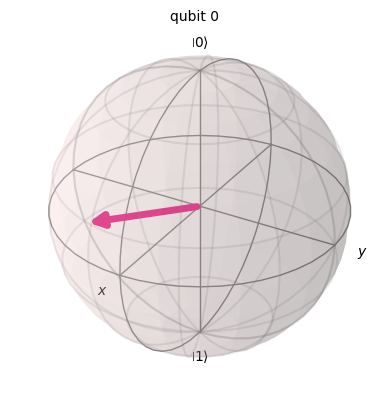

In [7]:
plot_bloch_multivector(svector)

In [8]:
psil = np.array([svector]) #bra
psic = np.conjugate(psil).T #ket

In [9]:
psil

array([[0.        +0.54772256j, 0.83666003+0.j        ]])

In [10]:
psic

array([[0.        -0.54772256j],
       [0.83666003-0.j        ]])

In [11]:
rho = psic@psil
print(rho)

[[0.3+0.j         0. -0.45825757j]
 [0. +0.45825757j 0.7+0.j        ]]


In [12]:
v0 = np.array([[1,0]])
v1 = np.array([[0,1]])

In [13]:
v1@rho@v1.T

array([[0.7+0.j]])

In [16]:
rhof = 0.7*rho + 0.3*v0.T@v0
print(rhof)

[[0.51+0.j        0.  -0.3207803j]
 [0.  +0.3207803j 0.49+0.j       ]]


In [17]:
np.trace(rhof@rhof)

(0.7059999999999998+0j)

In [18]:
from qiskit.visualization import array_to_latex
array_to_latex(rhof)

<IPython.core.display.Latex object>

In [19]:
ident = np.identity(2)
sx = np.array( [[0,1],[1,0]])
sy = np.array( [[0,-1j],[1j,0]])
sz = np.array([[1,0],[0,-1]])

In [23]:
Ox = np.trace(sx@rho)
Oy = np.trace(sy@rho)
Oz = np.trace(sz@rho)

In [24]:
ident/2 + (Ox/2)*sx + (Oy/2)*sy + (Oz/2)*sz

array([[0.3+0.j        , 0. -0.45825757j],
       [0. +0.45825757j, 0.7+0.j        ]])